In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data = pd.read_csv("../dataset/WeatherAUS.csv")


In [4]:
data.head()
data.describe()
data.info()
data.shape


<class 'pandas.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  str    
 1   Location       145460 non-null  str    
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  str    
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  str    
 10  WindDir3pm     141232 non-null  str    
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null   float64


(145460, 23)

In [5]:
data.isnull().sum()


Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3253
dtype: int64

In [6]:
cat_cols = data.select_dtypes(include='object').columns
num_cols = data.select_dtypes(exclude='object').columns


C:\Users\HP\AppData\Local\Temp\ipykernel_25868\847553458.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_cols = data.select_dtypes(include='object').columns


In [7]:
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy='mean')
data[num_cols] = num_imputer.fit_transform(data[num_cols])


In [8]:
cat_imputer = SimpleImputer(strategy='most_frequent')
data[cat_cols] = cat_imputer.fit_transform(data[cat_cols])


In [9]:
from sklearn.preprocessing import LabelEncoder

encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    encoders[col] = le


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.set_style("whitegrid")


<Figure size 1000x600 with 0 Axes>

In [11]:
cor = data.corr()
cor


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,1.000000,0.020198,0.020929,0.043892,-0.012112,0.060267,0.008184,-0.019588,-0.022976,0.002318,...,0.000045,-0.010951,0.031792,0.025755,0.051669,0.032652,0.031165,0.031318,-0.012801,-0.008470
Location,0.020198,1.000000,-0.008537,-0.022893,-0.003214,0.030609,0.002118,-0.003074,0.070514,-0.002808,...,0.000225,0.013321,0.035801,0.045928,-0.008536,-0.014150,-0.018206,-0.025735,-0.005573,0.001176
MinTemp,0.020929,-0.008537,1.000000,0.733400,0.102706,0.351321,0.051297,-0.136443,0.172553,-0.031327,...,-0.230970,0.005995,-0.423584,-0.433147,0.062151,0.016722,0.897692,0.699211,0.054559,0.083155
MaxTemp,0.043892,-0.022893,0.733400,1.000000,-0.074040,0.438653,0.328931,-0.211930,0.065895,-0.212968,...,-0.497927,-0.498760,-0.308309,-0.396622,-0.225315,-0.212760,0.879170,0.968713,-0.225439,-0.155381
Rainfall,-0.012112,-0.003214,0.102706,-0.074040,1.000000,-0.037863,-0.170973,0.044620,0.126446,0.084716,...,0.221380,0.248905,-0.159055,-0.119541,0.171144,0.145343,0.011069,-0.077684,0.499899,0.232781
Evaporation,0.060267,0.030609,0.351321,0.438653,-0.037863,1.000000,0.288169,-0.068923,0.147353,-0.064356,...,-0.373732,-0.286025,-0.210961,-0.230351,-0.150264,-0.145472,0.414592,0.425573,-0.139275,-0.088555
Sunshine,0.008184,0.002118,0.051297,0.328931,-0.170973,0.288169,1.000000,-0.063413,-0.023844,-0.070714,...,-0.348855,-0.443121,0.031406,-0.014815,-0.532497,-0.553853,0.208580,0.346685,-0.235296,-0.322506
WindGustDir,-0.019588,-0.003074,-0.136443,-0.211930,0.044620,-0.068923,-0.063413,1.000000,0.136200,0.353790,...,0.068775,0.065027,-0.119516,-0.031416,0.065525,0.057989,-0.177746,-0.223028,0.124675,0.048793
WindGustSpeed,-0.022976,0.070514,0.172553,0.065895,0.126446,0.147353,-0.023844,0.136200,1.000000,0.073234,...,-0.207964,-0.025355,-0.425760,-0.383938,0.052417,0.079927,0.145904,0.031884,0.145700,0.220406
WindDir9am,0.002318,-0.002808,-0.031327,-0.212968,0.084716,-0.064356,-0.070714,0.353790,0.073234,1.000000,...,0.088769,0.148476,-0.049202,0.040928,0.085977,0.053639,-0.116825,-0.220361,0.167718,0.036326


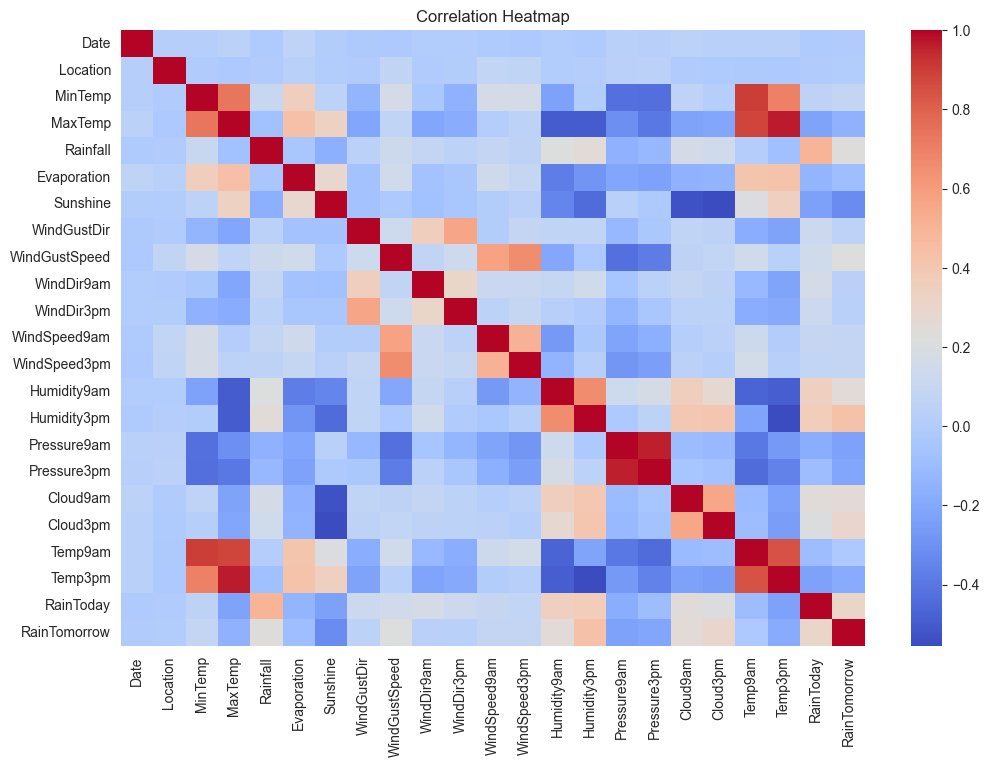

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(cor, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


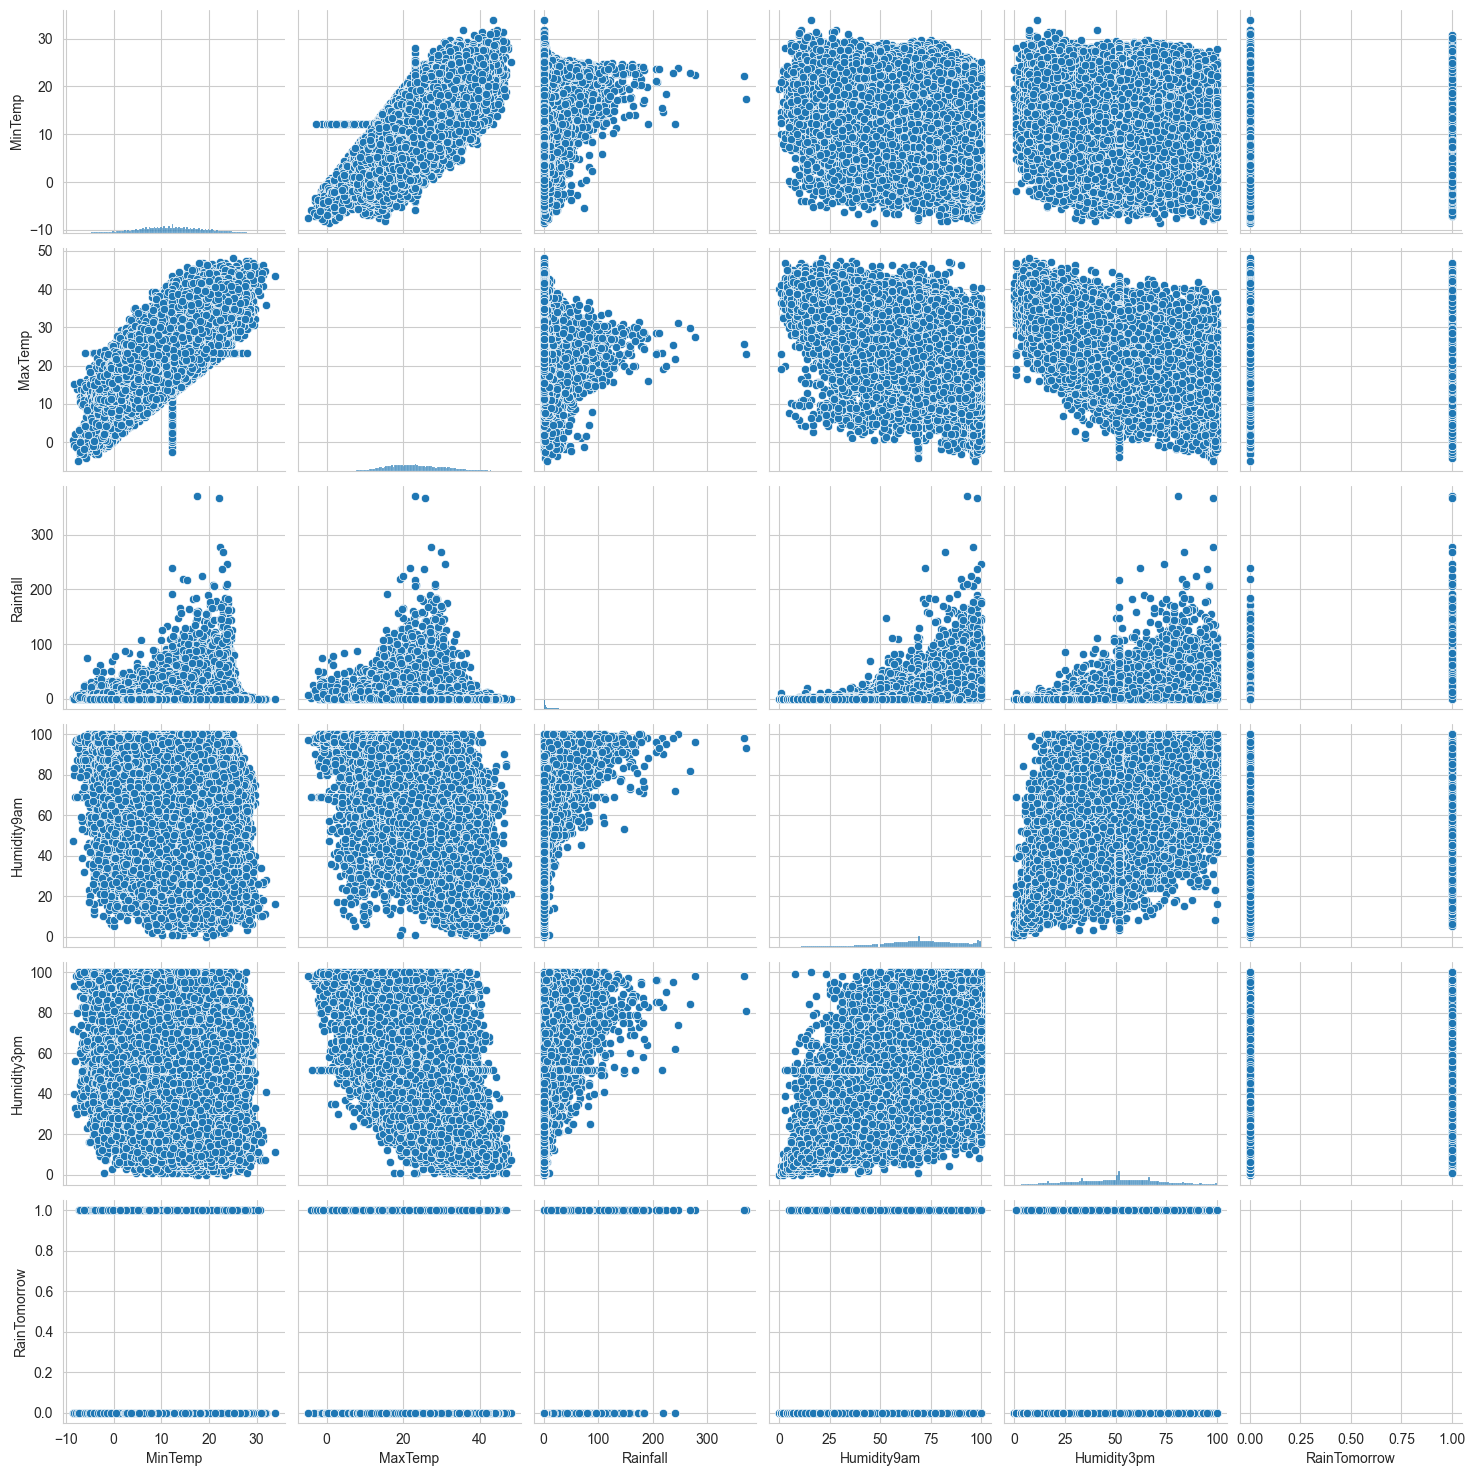

In [13]:
sns.pairplot(data[['MinTemp','MaxTemp','Rainfall','Humidity9am','Humidity3pm','RainTomorrow']])
plt.show()


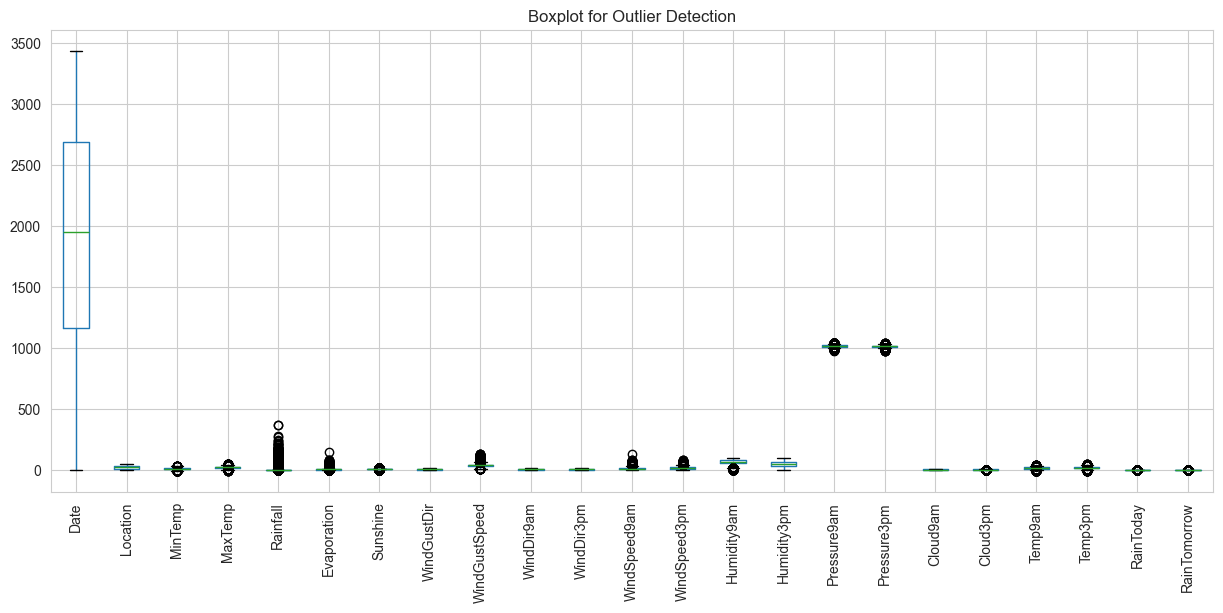

In [14]:
plt.figure(figsize=(15,6))
data.boxplot()
plt.xticks(rotation=90)
plt.title("Boxplot for Outlier Detection")
plt.show()


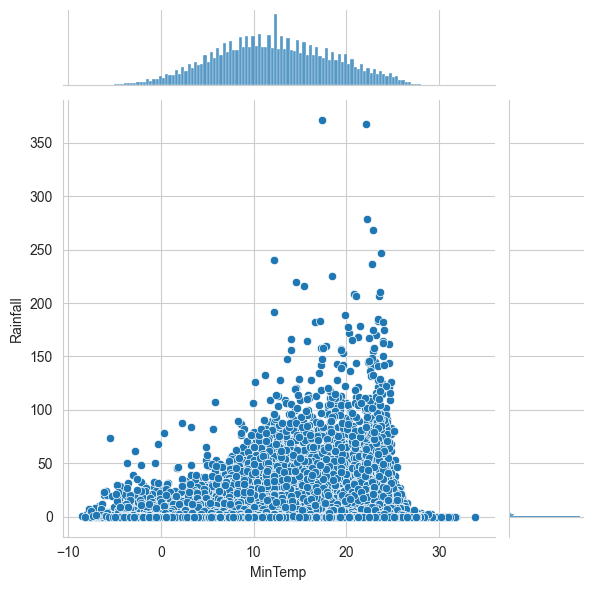

In [15]:
sns.jointplot(x='MinTemp', y='Rainfall', data=data, kind='scatter')
plt.show()


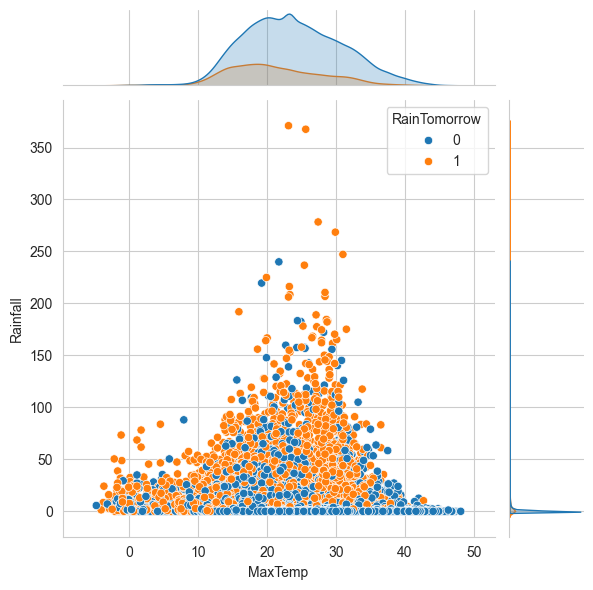

In [16]:
sns.jointplot(x='MaxTemp', y='Rainfall', data=data, hue='RainTomorrow')
plt.show()


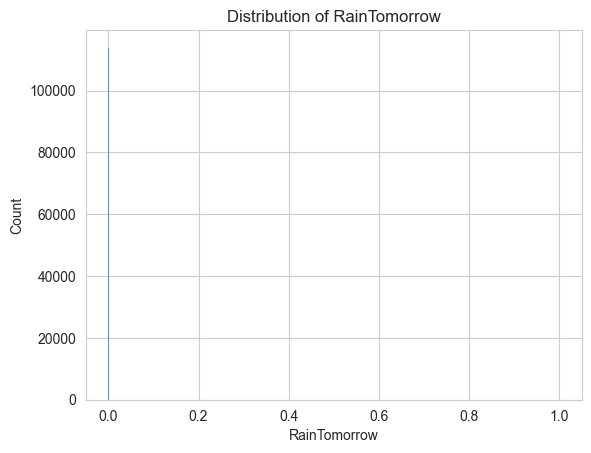

In [17]:
sns.histplot(data['RainTomorrow'])
plt.title("Distribution of RainTomorrow")
plt.show()


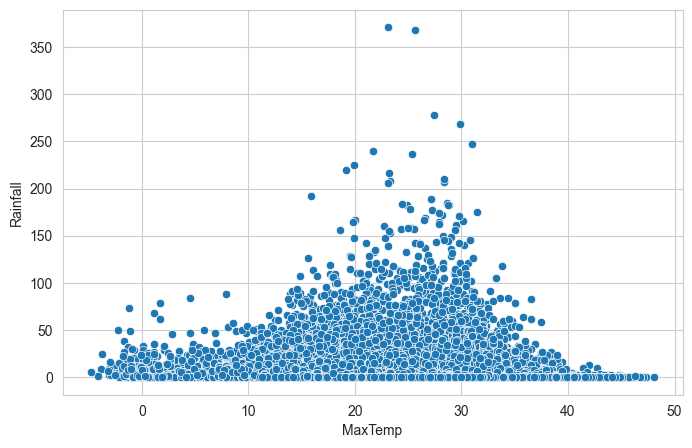

In [18]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='MaxTemp', y='Rainfall', data=data)
plt.show()


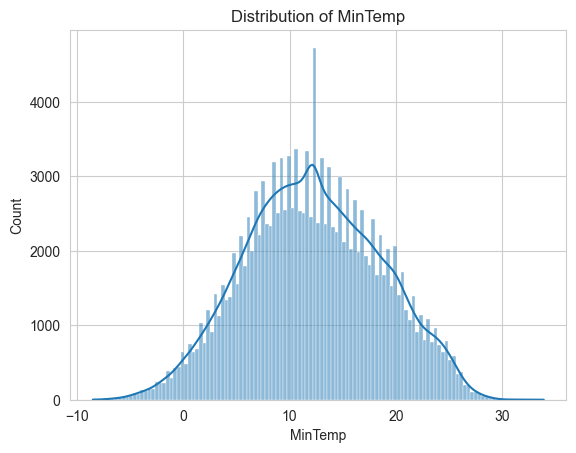

In [19]:
sns.histplot(data['MinTemp'], kde=True)
plt.title("Distribution of MinTemp")
plt.show()


In [20]:
y = data['RainTomorrow']
X = data.drop('RainTomorrow', axis=1)


In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score


In [24]:
log_model = LogisticRegression(max_iter=1000)
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
svm_model = SVC()
gb_model = GradientBoostingClassifier()
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')


In [25]:
log_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)


e:\project\.venv\Lib\site-packages\xgboost\training.py:200: UserWarning: [17:09:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes 

In [26]:
log_pred = log_model.predict(X_test)
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
svm_pred = svm_model.predict(X_test)
gb_pred = gb_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)


In [27]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_pred))
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))


Logistic Regression Accuracy: 0.8434277464595078
Decision Tree Accuracy: 0.7901141207204729
Random Forest Accuracy: 0.8554241715935652
SVM Accuracy: 0.8523992850268115
Gradient Boosting Accuracy: 0.8500274989687887
XGBoost Accuracy: 0.859720885466795


In [28]:
models = ['Logistic', 'Decision Tree', 'Random Forest', 'SVM', 'Gradient Boost', 'XGBoost']
scores = [
    accuracy_score(y_test, log_pred),
    accuracy_score(y_test, dt_pred),
    accuracy_score(y_test, rf_pred),
    accuracy_score(y_test, svm_pred),
    accuracy_score(y_test, gb_pred),
    accuracy_score(y_test, xgb_pred)
]

accuracy_df = pd.DataFrame({
    'Model': models,
    'Accuracy': scores
})

accuracy_df.sort_values(by='Accuracy', ascending=False)


,Model,Accuracy
5,XGBoost,0.859721
2,Random Forest,0.855424
3,SVM,0.852399
4,Gradient Boost,0.850027
0,Logistic,0.843428
1,Decision Tree,0.790114


In [29]:
best_model = rf_model  # assuming Random Forest gives highest accuracy


In [30]:
import os
import pickle

SAVE_PATH = "E:\project\Exploratory_Analysis_of_Rain_Fall_Data_in_India_for_Agriculture\models_saved" 
os.makedirs(SAVE_PATH, exist_ok=True)

pickle.dump(best_model, open(f"{SAVE_PATH}/rainfall.pkl", "wb"))
pickle.dump(scaler, open(f"{SAVE_PATH}/scaler.pkl", "wb"))
pickle.dump(encoders, open(f"{SAVE_PATH}/encoder.pkl", "wb"))
pickle.dump(num_imputer, open(f"{SAVE_PATH}/imputer.pkl", "wb"))

<>:4: SyntaxWarning: invalid escape sequence '\p'
<>:4: SyntaxWarning: invalid escape sequence '\p'
C:\Users\HP\AppData\Local\Temp\ipykernel_25868\889499449.py:4: SyntaxWarning: invalid escape sequence '\p'
  SAVE_PATH = "E:\project\Exploratory_Analysis_of_Rain_Fall_Data_in_India_for_Agriculture\models_saved"
